In [57]:
import pandas as pd 
import wandb
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.ticker import FormatStrFormatter, MaxNLocator
from scipy.stats import norm
from PIL import Image, ImageEnhance

import seaborn as sns
sns.set_style("white")
sns.set(context='notebook',
        style='ticks',
        font_scale=1,
        rc={'axes.grid':True,
            'grid.color':'.9',
            'grid.linewidth':0.75})

import sys
import os
sys.path.insert(1, os.path.dirname(os.getcwd()))

In [58]:
fontsize = 20
labelsize = 18
lw = 4
markersize = 8

### Real Data Plots

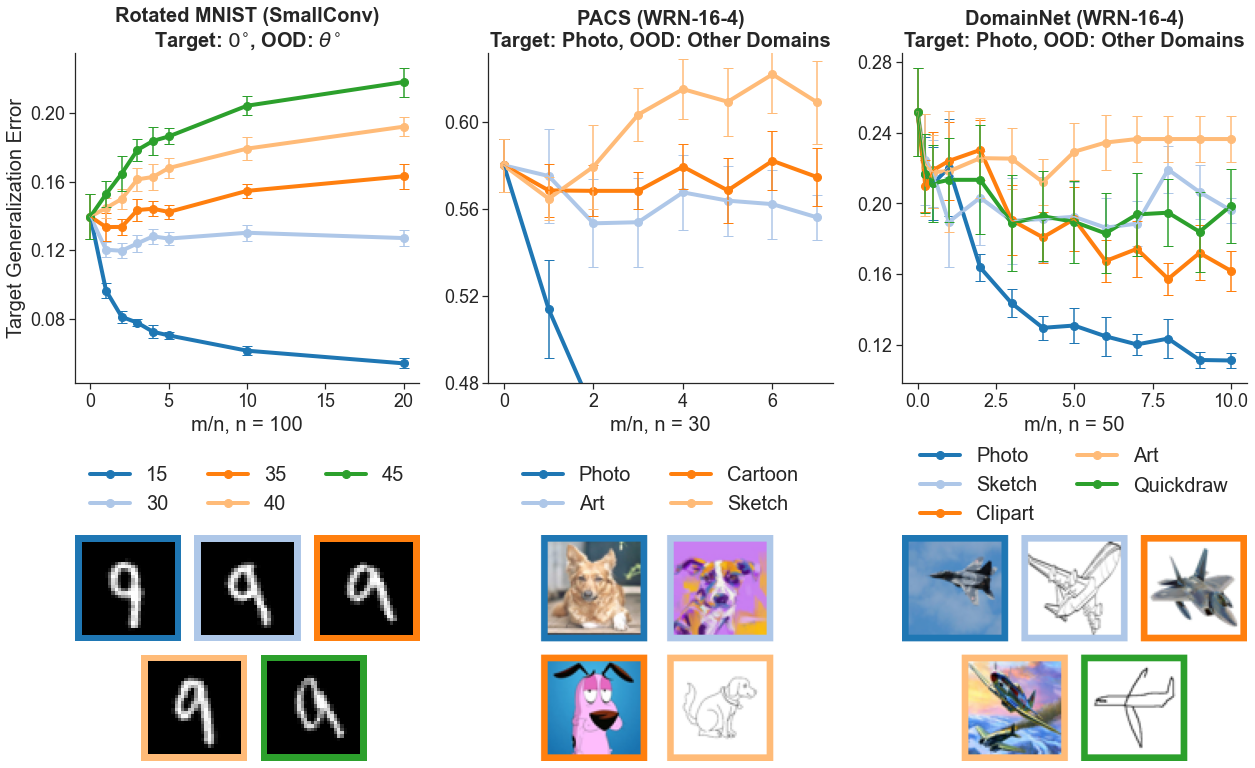

In [25]:
# rotated mnist 
fontsize = 22
labelsize = 20
lw = 4
markersize = 8

fig, axes = plt.subplots(2, 3, figsize=((21, 14)))

# MNIST curves
ax = axes[0][0]
df_mnist = pd.read_csv("results/01_rotated_mnist.csv")

env_list = [15, 30, 35, 40, 45]
reps = 10
n = 100

cmap = [plt.cm.tab20(i) for i in range(len(env_list))]
fontsize = 20
labelsize = 18

for i, env in enumerate(env_list):
    df = df_mnist[df_mnist['ood'] == env].reset_index(drop=True)

    m_n = df['m_n'].to_numpy()
    avg_error = df['avg_error'].to_numpy()
    std_error = df['std_error'].to_numpy()
    ci = 1.96 * std_error / np.sqrt(reps)
    ax.plot(m_n, avg_error, color=cmap[i], label=env_list[i], lw=lw, marker='o', markersize=markersize)
    ax.errorbar(m_n, avg_error, yerr=ci, color=cmap[i], solid_capstyle='projecting', capsize=5)
    ax.set_ylabel("Target Generalization Error", fontsize=fontsize)
    
    ax.set_xlabel("m/n, n = {}".format(n), fontsize=fontsize)
    ax.set_title(r"Rotated MNIST (SmallConv)" + "\n" + r"Target: $0^{\circ}$, OOD: $\theta^{\circ}$", fontsize=fontsize, fontweight="bold")

    ax.tick_params(axis='x', labelsize=labelsize)
    ax.tick_params(axis='y', labelsize=labelsize)
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.grid(False)

legend = ax.legend(bbox_to_anchor=(0.5, -0.45), loc=8, ncol=3, fontsize=fontsize, frameon=False)
# legend.get_title().set_fontsize(fontsize)

# PACS curves
ax = axes[0][1]
df_pacs = pd.read_csv("results/02_pacs.csv")

env_list = ["P", "A", "C", "S"]
env_long_list = ["Photo", "Art", "Cartoon", "Sketch"]
n = 30
reps = 10

cmap = [plt.cm.tab20(i) for i in range(len(env_list))]

for i, env in enumerate(env_list):
    df = df_pacs[df_pacs['ood'] == env].reset_index(drop=True)

    m_n = df['m_n'].to_numpy()
    avg_error = df['avg_error'].to_numpy()
    std_error = df['std_error'].to_numpy()
    ci = 1.96 * std_error / np.sqrt(reps)
    m_n = m_n[:8]
    avg_error = avg_error[:8]
    ci = ci[:8]
    ax.plot(m_n, avg_error, color=cmap[i], label=env_long_list[i], lw=lw, marker='o', markersize=markersize)
    ax.errorbar(m_n, avg_error, yerr=ci, color=cmap[i], solid_capstyle='projecting', capsize=5)
    # ax.set_ylabel("Target Generalization Error", fontsize=fontsize)
    ax.set_ylim([0.48, avg_error.max()+0.01])
    
    ax.set_xlabel("m/n, n = {}".format(n), fontsize=fontsize)
    ax.set_title("PACS (WRN-16-4)" + "\n" + "Target: Photo, OOD: Other Domains", fontsize=fontsize, fontweight="bold")

    ax.tick_params(axis='x', labelsize=labelsize)
    ax.tick_params(axis='y', labelsize=labelsize)
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.grid(False)

legend = ax.legend(bbox_to_anchor=(0.5, -0.45), loc=8, ncol=2, fontsize=fontsize, frameon=False)
legend.get_title().set_fontsize(fontsize)

sns.despine()


# DomainNet curves
ax = axes[0][2]
df_dom = pd.read_csv("results/03_domainnet.csv")

env_list = ["P", "S", "C", "A", "Q"]
env_long_list = ["Photo", "Sketch", "Clipart", "Art", "Quickdraw"]
n = 50
reps = 10

cmap = [plt.cm.tab20(i) for i in range(len(env_list))]

for i, env in enumerate(env_list):
    df = df_dom[df_dom['ood'] == env].reset_index(drop=True)

    m_n = df['m_n'].to_numpy()
    avg_error = df['avg_error'].to_numpy()
    std_error = df['std_error'].to_numpy()
    ci = 1.96 * std_error / np.sqrt(reps)
    ax.plot(m_n, avg_error, color=cmap[i], label=env_long_list[i], lw=lw, marker='o', markersize=markersize)
    ax.errorbar(m_n, avg_error, yerr=ci, color=cmap[i], solid_capstyle='projecting', capsize=5)
    
    ax.set_xlabel("m/n, n = {}".format(n), fontsize=fontsize)
    ax.set_title("DomainNet (WRN-16-4)" + "\n" + "Target: Photo, OOD: Other Domains", fontsize=fontsize, fontweight="bold")

    ax.tick_params(axis='x', labelsize=labelsize)
    ax.tick_params(axis='y', labelsize=labelsize)
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.grid(False)

legend = ax.legend(bbox_to_anchor=(0.5, -0.48), loc=8, ncol=2, fontsize=fontsize, frameon=False)
legend.get_title().set_fontsize(fontsize)

sns.despine()


# MNIST OOD domains
ax = axes[1][0]
ax.grid(False)

loc_list = [(0,0), (36, 0), (72, 0), (20, 36), (56, 36)]
env_list = [15, 30, 35, 40, 45]

collage = Image.fromarray(255*np.ones((68,104,3),dtype="uint8"), mode="RGB")
for i, env in enumerate(env_list):
    im = Image.open("figures/mnist/{}.png".format(env))
    collage.paste(im, loc_list[i])
ax.imshow(collage)
ax.axis('off')

# PACS OOD domains
ax = axes[1][1]
ax.grid(False)

loc_list = [(32,0), (108, 0), (32,72), (108, 72)]
env_list = ["P", "A", "C", "S"]
cmap = [plt.cm.tab20(i) for i in range(len(env_list))]
collage = Image.fromarray(255*np.ones((136,208,3),dtype="uint8"), mode="RGB")
for i, env in enumerate(env_list):
    pad = np.zeros((64, 64, 3))
    pad[:, :, 0] = cmap[i][0]
    pad[:, :, 1] = cmap[i][1]
    pad[:, :, 2] = cmap[i][2]
    pad = np.array(255*pad, dtype="uint8")
    pad = Image.fromarray(pad, mode="RGB")
    im = Image.open("figures/pacs/{}.jpg".format(env))
    im = im.resize((56, 56))
    pad.paste(im, (4, 4))
    collage.paste(pad, loc_list[i])
ax.imshow(collage)
ax.axis('off')

# DomainNet OOD domains
ax = axes[1][2]
ax.grid(False)

loc_list = [(0,0), (72, 0), (144, 0), (36, 72), (108, 72)]
env_list =  ["P", "S", "C", "A", "Q"]
cmap = [plt.cm.tab20(i) for i in range(len(env_list))]
collage = Image.fromarray(255*np.ones((136,208,3),dtype="uint8"), mode="RGB")
for i, env in enumerate(env_list):
    pad = np.zeros((64, 64, 3))
    pad[:, :, 0] = cmap[i][0]
    pad[:, :, 1] = cmap[i][1]
    pad[:, :, 2] = cmap[i][2]
    pad = np.array(255*pad, dtype="uint8")
    pad = Image.fromarray(pad, mode="RGB")
    im = Image.open("figures/domainnet/{}.png".format(env))
    im = im.resize((56, 56))
    pad.paste(im, (4, 4))
    collage.paste(pad, loc_list[i])
ax.imshow(collage)
ax.axis('off')

# left  = 0.125  # the left side of the subplots of the figure
# right = 0.9    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.4   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.30)

plt.show()

In [26]:
fig.savefig("../paper/figs/8-realdata-plot.pdf", bbox_inches="tight")

### Simulation Plot

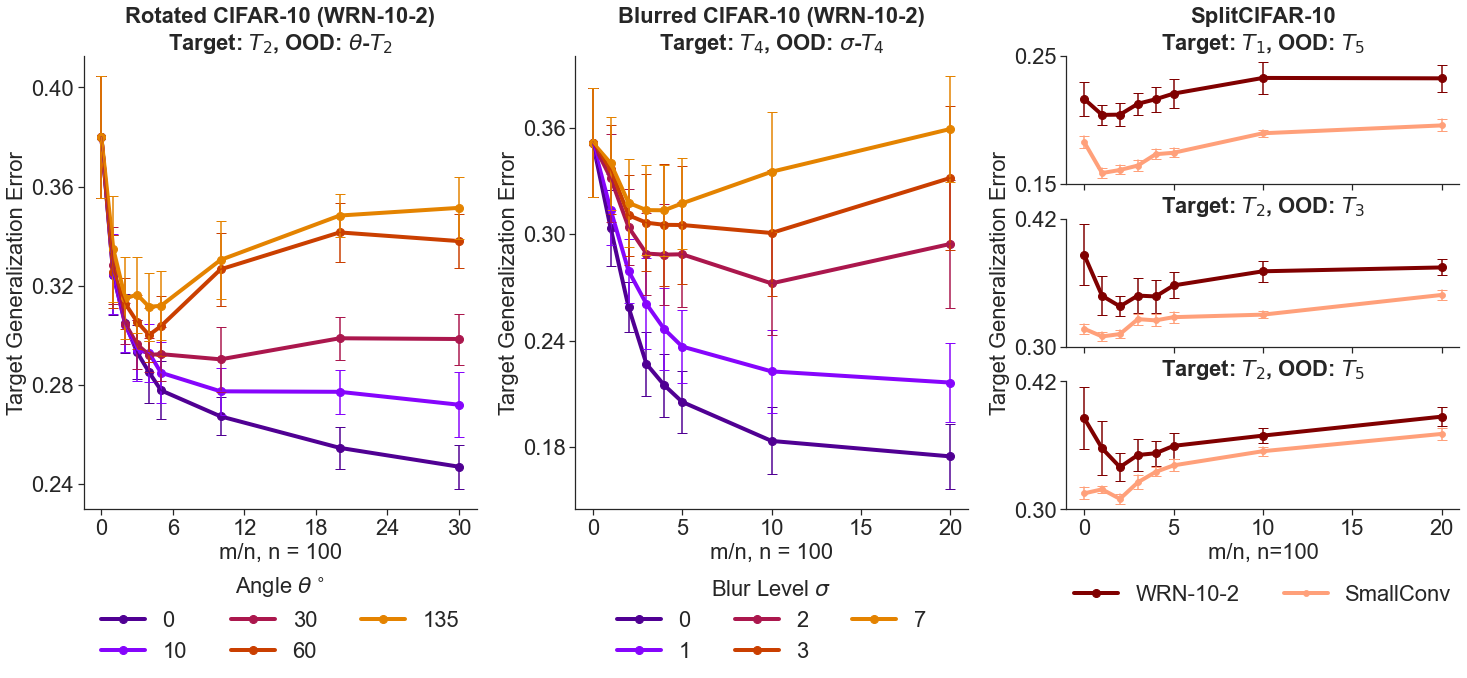

In [59]:
fontsize = 22
labelsize = 22
lw = 4
markersize = 8

outer = [['left', 'middle', 'upper right'],
            ['left', 'middle', 'middle right'],
            ['left', 'middle', 'lower right']]

fig, axes = plt.subplot_mosaic(outer, figsize=(21, 9))
sns.despine()

path = "results/cifar10_dual_tasks_smallconv/selected_results"

# rotated CIFAR-10
ax = axes['left']
runs_df = pd.read_csv("results/06_rotated_cifar10.csv")
angle_list = [0,  10,  30, 60, 135]
cmap = [plt.cm.gnuplot(i) for i in np.linspace(0.1,0.8,len(angle_list))]
reps = 10
n = 100

for i, angle in enumerate(angle_list):
    df = runs_df[runs_df['angle'] == angle].reset_index(drop=True)
    m_n = df['m_n'].to_numpy()[:-1]
    avg_error = df['avg_error'].to_numpy()[:-1]
    std_error = df['std_error'].to_numpy()[:-1]
    ci = 1.96 * std_error / np.sqrt(10)
    ax.plot(m_n, avg_error , color=cmap[i], label=angle, lw=lw, marker='o', markersize=markersize)
    ax.errorbar(m_n, avg_error, yerr=ci, color=cmap[i], solid_capstyle='projecting', capsize=5)
    ax.set_ylabel("Target Generalization Error", fontsize=fontsize)
    ax.set_xlabel("m/n, n = {}".format(n), fontsize=fontsize)
    ax.set_title("Rotated CIFAR-10 (WRN-10-2)" + "\n" + r"Target: $T_2$, OOD: $\theta$-$T_2$", fontsize=fontsize, fontweight="bold")
    ax.tick_params(axis='x', labelsize=labelsize)
    ax.tick_params(axis='y', labelsize=labelsize)
    ax.xaxis.set_major_locator(MaxNLocator(6))
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.grid(False)
legend = ax.legend(bbox_to_anchor=(0.5, -0.38), loc="lower center", ncol=3, frameon=False, title=r"Angle $\theta^\circ$", fontsize=labelsize)
legend.get_title().set_fontsize(fontsize)

# blurred CIFAR-10
ax = axes['middle']
runs_df = pd.read_csv("results/07_blurred_cifar10.csv")
task = 3
sigma_list = [0,1,2,3,7]
cmap = [plt.cm.gnuplot(i) for i in np.linspace(0.1, 0.8, len(sigma_list))]
dft = runs_df[runs_df['task'] == task].reset_index(drop=True)
reps = 10

for i, sigma in enumerate(sigma_list):
    df = dft[dft['sigma'] == sigma].reset_index(drop=True)
    m_n = df['m_n'].to_numpy()
    avg_error = df['avg_error'].to_numpy()
    std_error = df['std_error'].to_numpy()
    ci = 1.96 * std_error / np.sqrt(reps)
    ax.plot(m_n, avg_error , color=cmap[i], label=sigma, lw=lw, marker='o', markersize=markersize)
    ax.errorbar(m_n, avg_error, yerr=ci, color=cmap[i], solid_capstyle='projecting', capsize=5)
    ax.set_ylabel("Target Generalization Error", fontsize=fontsize)
    ax.set_xlabel("m/n, n = 100", fontsize=fontsize)
    ax.set_title("Blurred CIFAR-10 (WRN-10-2)" + "\n" + r"Target: $T_4$, OOD: $\sigma$-$T_4$", fontsize=fontsize, fontweight="bold")
    ax.tick_params(axis='x', labelsize=labelsize)
    ax.tick_params(axis='y', labelsize=labelsize)
    ax.yaxis.set_major_locator(MaxNLocator(5)) 
    ax.grid(False)
legend = ax.legend(bbox_to_anchor=(0.5, -0.38), loc=8, ncol=3, fontsize=labelsize, frameon=False, title="Blur Level $\sigma$")
legend.get_title().set_fontsize(fontsize)

# SplitCIFAR-10 selected task pairs
dft = pd.read_csv("results/09_wrn_cifar_agnostic.csv")
dft = dft.sort_values(by=['target', 'ood', 'm_n']).reset_index(drop=True)
pairs = [[0, 4], [1, 2], [1, 4]]
folders = ["T1_T5", "T2_T3", "T2_T5"]
lw = 2
for i, pair in enumerate(pairs):
    ax = axes[outer[i][2]]
    target, ood = pair[0], pair[1]
    avg_err = np.array(dft[(dft["target"]==target) & (dft["ood"]==ood)]["avg_error"])
    std_err = np.array(dft[(dft["target"]==target) & (dft["ood"]==ood)]["std_error"])
    m_n = np.array(dft[(dft["target"]==target) & (dft["ood"]==ood)]["m_n"])

    ci = 1.96 * std_err.astype('float')/np.sqrt(10)
    ax.plot(m_n, avg_err, c='maroon', lw=lw+2, marker="o", markersize=markersize, label="WRN-10-2")
    ax.errorbar(m_n, avg_err, yerr=ci, color='maroon', solid_capstyle='projecting', capsize=5)

    file = "{}/{}/Task_Agnostic/cifar10_smallconv_singlehead_dual_tasks_T{}.csv".format(path, folders[i], pair[0]+1)
    df = pd.read_csv(file)
    df = df.filter(['m', 'r', str(pair[1]+1)])
    dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')
    ax = sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=ax, marker="o", markeredgecolor=None, ci=95, lw=lw+2, palette=("lightsalmon",), legend=False, err_style="bars", err_kws={'solid_capstyle':'projecting', 'capsize':5}, label="SmallConv")

    ax.set_yticks(ax.get_ylim())
    if i == 0:
        ax.set_title("SplitCIFAR-10" + "\n" + r"Target: $T_{}$, OOD: $T_{}$".format(pair[0]+1, pair[1]+1), fontsize=fontsize, fontweight="bold")
        # ax.set_title(r"$\bf{Split-CIFAR10}$" + "\n" + r"Target: $T_{}$, OOD: $T_{}$".format(pair[0]+1, pair[1]+1), fontsize=fontsize)
    else:
        ax.set_title(r"Target: $T_{}$, OOD: $T_{}$".format(pair[0]+1, pair[1]+1), fontsize=fontsize, fontweight="bold")
    ax.tick_params(axis='y', labelsize=labelsize)
    ax.xaxis.set_major_locator(MaxNLocator(5)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.grid(False)

    if i==1:
        ax.set_ylabel("Target Generalization Error", fontsize=fontsize)
    else:
        ax.set_ylabel("")
        
    if i==2:    
        ax.set_xlabel(r"m/n, n=100", fontsize=fontsize)
        ax.tick_params(axis='x', labelsize=labelsize)
        ax.tick_params(axis='y', labelsize=labelsize)  
    else:
        ax.set_xlabel("")
        ax.set_xticklabels("")

legend = ax.legend(bbox_to_anchor=(0.5, -0.90), loc=8, ncol=2, fontsize=labelsize, frameon=False)

left  = 0.07  # the left side of the subplots of the figure
right = 0.98    # the right side of the subplots of the figure
bottom = 0.25   # the bottom of the subplots of the figure
top = 0.95      # the top of the subplots of the figure
wspace = 0.25   # the amount of width reserved for blank space between subplots
hspace = 0.27   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)

plt.show()


In [60]:
fig.savefig("../paper/figs/9-simdata-plot.pdf", bbox_inches="tight")

### CINIC Figure

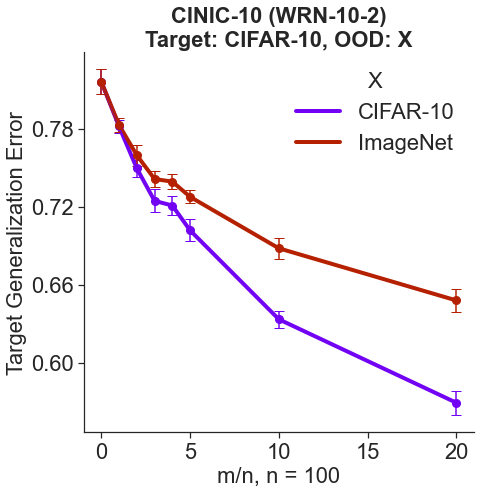

In [61]:
df_cifar = pd.read_csv("./results/10_cifar_vs_cifar.csv")
df_imagenet = pd.read_csv("./results/10_cifar_vs_imagenet.csv")

fontsize = 22
labelsize = 22
lw = 4
markersize = 8

dfs = [df_cifar, df_imagenet]
cmap = [plt.cm.gnuplot(i) for i in np.linspace(0.2, 0.5, len(dfs))]
labels = ["CIFAR-10", "ImageNet"]

fig, ax = plt.subplots(figsize=(7, 7))
sns.despine()

for i, df in enumerate(dfs):
    m_n = df['m_n'].to_numpy()
    avg_error = df['avg_error'].to_numpy()
    std_error = df['std_error'].to_numpy()
    ci = 1.96 * std_error / np.sqrt(10)
    ax.plot(m_n, avg_error , color=cmap[i], label=labels[i], lw=lw)
    ax.errorbar(m_n, avg_error, yerr=ci, color=cmap[i], solid_capstyle='projecting', capsize=5, marker="o", markersize=markersize)
    ax.set_ylabel("Target Generalization Error", fontsize=fontsize)
    ax.set_xlabel("m/n, n = 100", fontsize=fontsize)
    ax.set_title("CINIC-10 (WRN-10-2)" + "\n" + "Target: CIFAR-10, OOD: X", fontsize=fontsize, fontweight="bold")
    ax.tick_params(axis='x', labelsize=labelsize)
    ax.tick_params(axis='y', labelsize=labelsize)
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(5))
legend = ax.legend(fontsize=fontsize, title="X", frameon=False)
legend.get_title().set_fontsize(fontsize)
ax.grid(False)

plt.show()

In [32]:
fig.savefig("../paper/figs/10-cinic-plot.pdf", bbox_inches="tight")

### Effect of Augmentation, Pretraining, Hyperparam Opt

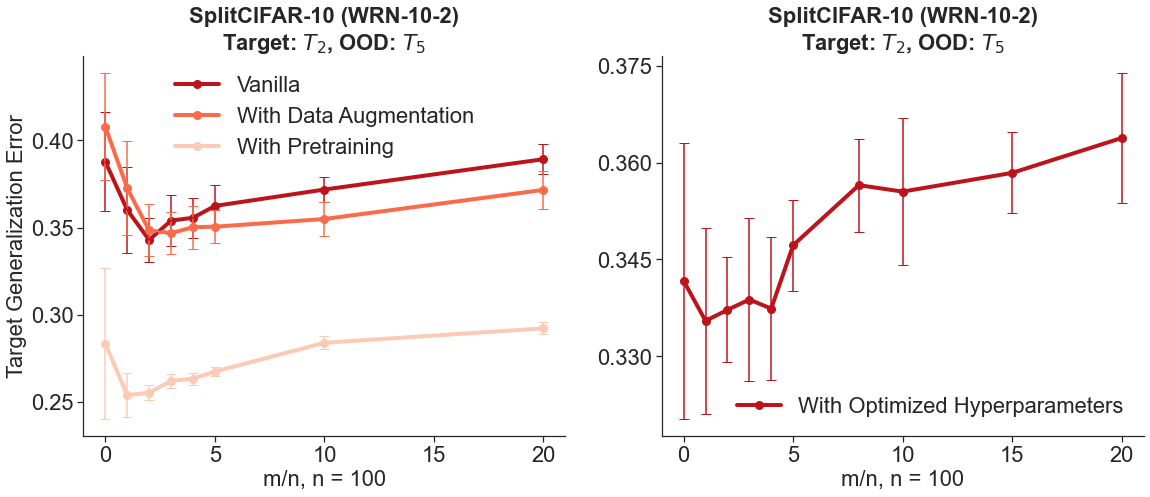

In [33]:
fontsize = 22
labelsize = 22
reps = 10
n = 100

fig, axes = plt.subplots(1, 2, figsize=(19, 7))
sns.despine()
ax = axes[0]

runs_df = pd.read_csv("results/04_effect_of_pretraining.csv")
df_vanilla = runs_df[runs_df['ptw'] == 0].reset_index(drop=True)
df_pt = runs_df[runs_df['ptw'] == 1].reset_index(drop=True)
df_aug = pd.read_csv("results/04_effect_of_augmentation.csv")
dfs = [df_vanilla, df_aug, df_pt]

label_list = ["Vanilla", "With Data Augmentation", "With Pretraining"]
cmap = [plt.cm.Reds_r(i) for i in np.linspace(0.2, 0.8, 3)]

for i, df in enumerate(dfs):
    m_n = df['m'].to_numpy() / n
    avg_error = df['avg_error'].to_numpy()
    std_error = df['std_error'].to_numpy()
    ci = 1.96 * std_error / np.sqrt(reps)
    ax.plot(m_n, avg_error , color=cmap[i], label=label_list[i], lw=lw, marker='o', markersize=markersize)
    ax.errorbar(m_n, avg_error, yerr=ci, color=cmap[i], solid_capstyle='projecting', capsize=5)
    ax.set_ylabel("Target Generalization Error", fontsize=fontsize)
    ax.set_xlabel("m/n, n = {}".format(n), fontsize=fontsize)
    ax.set_title("SplitCIFAR-10 (WRN-10-2)" + "\n" + r"Target: $T_2$, OOD: $T_5$", fontsize=fontsize, fontweight="bold")
    ax.tick_params(axis='x', labelsize=labelsize)
    ax.tick_params(axis='y', labelsize=labelsize)
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(5))
ax.legend(fontsize=fontsize, frameon=False)
ax.grid(False)

ax = axes[1]
reps = 10
n = 100

df_hyp = pd.read_csv("results/04_effect_of_hyperparamopt.csv")
m_n = np.array(df_hyp['m_n'])
avg_error = np.array(df_hyp['avg_error'])
std_error = np.array(df_hyp['std_error'])

ci = 1.96 * std_error / np.sqrt(reps)
ax.plot(m_n, avg_error , color=plt.cm.Reds_r(0.2), lw=lw, marker='o', markersize=markersize, label="With Optimized Hyperparameters")
ax.errorbar(m_n, avg_error, yerr=ci, color=plt.cm.Reds_r(0.2), solid_capstyle='projecting', capsize=5)
ax.set_xlabel("m/n, n = {}".format(n), fontsize=fontsize)
ax.set_title("SplitCIFAR-10 (WRN-10-2)" + "\n" + r"Target: $T_2$, OOD: $T_5$", fontsize=fontsize, fontweight="bold")
# ax.set_title(r"BlurredCIFAR10, Target: Task {}, OOD: $\sigma$-blurred Task {}".format(task, task), fontsize=fontsize)
ax.tick_params(axis='x', labelsize=labelsize)
ax.tick_params(axis='y', labelsize=labelsize)
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.legend(fontsize=fontsize, frameon=False)
ax.grid(False)

plt.show()

In [34]:
fig.savefig("../paper/figs/11-effect-of-hyp-aug-pt.pdf", bbox_inches="tight")

### OOD Known Plots

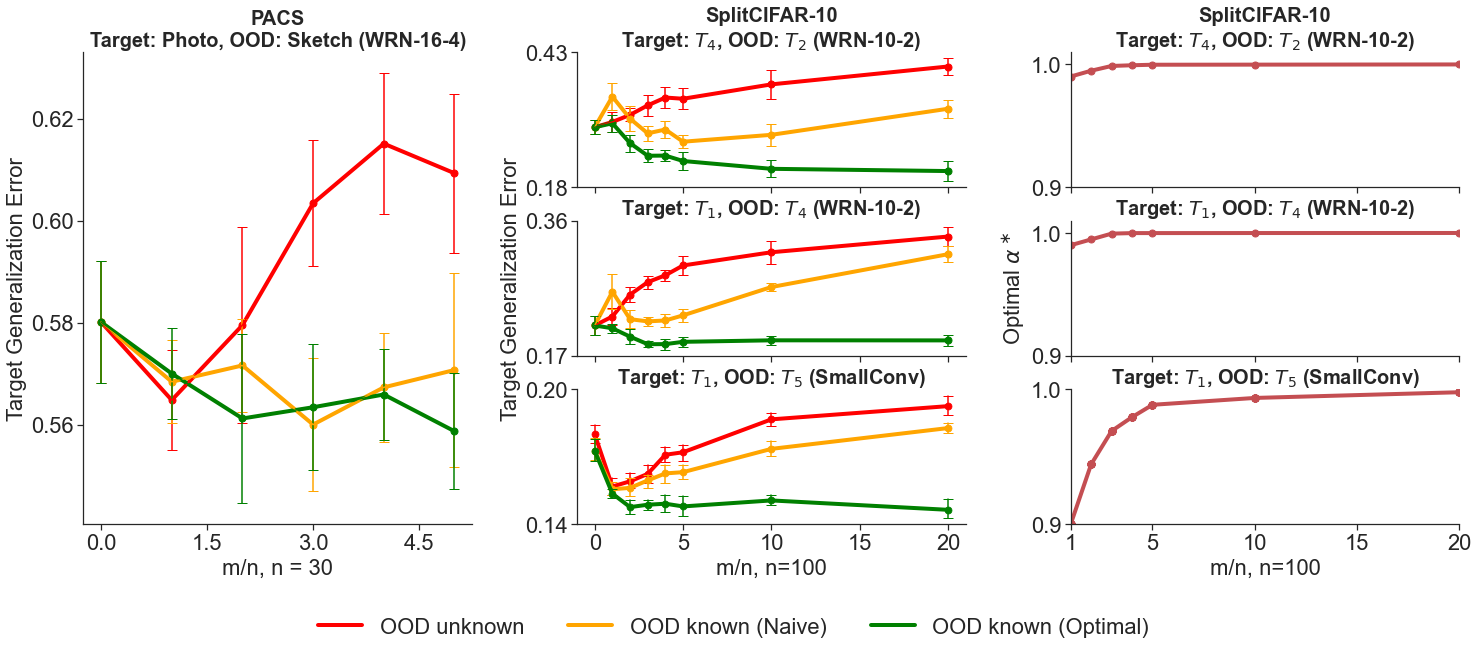

In [35]:
import ast

fontsize = 22
labelsize = 22
lw = 4
markersize = 7
titlesize = fontsize-2

inner1 = [["left upper"]]
inner2 = [['upper middle'],
            ['middle middle'],
            ['lower middle']]
inner3 = [['upper right'],
            ['middle right'],
            ['lower right']]
outer = [[inner1, inner2, inner3]]

# path = "/Users/ashwindesilva/research/ood-tl/experiments/results/cifar10_dual_tasks/selected_results"
path = "results/cifar10_dual_tasks_smallconv/selected_results"

fig, axes = plt.subplot_mosaic(outer, figsize=(21, 8))
sns.despine()

# PACS
ax = axes["left upper"]
df_agnostic = pd.read_csv("results/PCAS_PvS_agnostic.csv")
df_naive = pd.read_csv("results/PCAS_PvS_naive.csv")
df_opt = pd.read_csv("results/PCAS_PvS_opt2.csv")

dfs = [df_agnostic, df_naive, df_opt]
colors = ["red", "orange", "green"]

n = 30
df_agnostic = df_agnostic.sort_values(by=['target', 'ood', 'm_n']).reset_index(drop=True)
indices = np.array([0,1,2,3,4,5])
for k, df in enumerate(dfs):
    df = df.sort_values(by=['target', 'ood', 'm_n']).reset_index(drop=True)
    i='P'
    j='S'
    
    avg_err_ag = np.array(df_agnostic[(df_agnostic["target"]==i) & (df_agnostic["ood"]==j)]["avg_error"])
    std_errs_ag = np.array(df_agnostic[(df_agnostic["target"]==i) & (df_agnostic["ood"]==j)]["std_error"])
    avg_err = np.array(df[(df["target"]==i) & (df["ood"]==j)]["avg_error"])
    std_errs = np.array(df[(df["target"]==i) & (df["ood"]==j)]["std_error"])
    m_n = np.array(df[(df["target"]==i) & (df["ood"]==j)]["m_n"])

    # if k != 2:
    avg_err = avg_err[indices]
    std_errs = std_errs[indices]
    m_n = m_n[indices]

    avg_err[0] = avg_err_ag[0]
    std_errs[0] = std_errs_ag[0]

    ci = 1.96 * std_errs.astype('float')/np.sqrt(10)
    ax.plot(m_n, avg_err, c=colors[k], lw=lw, marker='o', markersize=markersize)
    ax.errorbar(m_n, avg_err, yerr=ci, color=colors[k], solid_capstyle='projecting', capsize=5)
    ax.set_ylabel("Target Error")
    ax.set_xlabel("m/n, n=30")

    ax.set_ylabel("Target Generalization Error", fontsize=fontsize)
    ax.set_xlabel("m/n, n = {}".format(n), fontsize=fontsize)
    ax.set_title("PACS" + "\n" + "Target: Photo, OOD: Sketch (WRN-16-4)", fontsize=titlesize,  fontweight="bold")
    
    ax.tick_params(axis='x', labelsize=labelsize)
    ax.tick_params(axis='y', labelsize=labelsize)
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(5))

# SplitCIFAR-10 selected task pairs

# WRN
df_agnostic = pd.read_csv("results/09_wrn_cifar_agnostic.csv")
df_naive = pd.read_csv("results/09_wrn_cifar_naive.csv")
df_opt = pd.read_csv("results/09_wrn_cifar_opt.csv")
df_agnostic = df_agnostic.sort_values(by=['target', 'ood', 'm_n']).reset_index(drop=True)

dfs = [df_agnostic, df_naive, df_opt]
colors = ["red", "orange", "green"]

pairs = [[3, 1], [0, 3]]

for l, pair in enumerate(pairs):
    for k, df in enumerate(dfs):
        df = df.sort_values(by=['target', 'ood', 'm_n']).reset_index(drop=True)
        ax = axes[inner2[l][0]]
        target, ood = pair[0], pair[1]
        ax.tick_params(labelsize=labelsize)

        dft = df[(df["target"]==target) & (df["ood"]==ood)].reset_index(drop=True)
        if k==2 and len(np.unique(dft['device']))==2:
            avg_err = np.array(dft[dft["device"]=='cuda:3']["avg_error"])
            std_err = np.array(dft[dft["device"]=='cuda:3']["std_error"])
            m_n = np.array(dft[dft["device"]=='cuda:3']["m_n"])
        else:
            avg_err = np.array(dft["avg_error"])
            std_err = np.array(dft["std_error"])
            m_n = np.array(dft["m_n"])

        avg_err_ag = np.array(df_agnostic[(df_agnostic["target"]==target) & (df_agnostic["ood"]==ood)]["avg_error"])
        std_err_ag = np.array(df_agnostic[(df_agnostic["target"]==target) & (df_agnostic["ood"]==ood)]["std_error"])
        
        avg_err[0] = avg_err_ag[0]
        std_err[0] = std_err_ag[0]

        ci = 1.96 * std_err.astype('float')/np.sqrt(10)
        ax.plot(m_n, avg_err, lw=lw, marker="o", markersize=markersize, color=colors[k])
        ax.errorbar(m_n, avg_err, yerr=ci, color=colors[k], solid_capstyle='projecting', capsize=5)
        if l == 0:
            ax.set_title("SplitCIFAR-10" + "\n" + r"Target: $T_{}$, OOD: $T_{}$ (WRN-10-2)".format(target+1, ood+1), fontsize=titlesize,  fontweight="bold")
        else:
            ax.set_title(r"Target: $T_{}$, OOD: $T_{}$ (WRN-10-2)".format(target+1, ood+1), fontsize=titlesize, fontweight="bold")
        ax.set_xticklabels([])
        ax.set_yticks(ax.get_ylim())
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        if l==1:
            ax.set_ylabel("Target Generalization Error", fontsize=fontsize)
        else:
            ax.set_ylabel("")

        if k == 2:
            dfa = dft[dft["device"]=='cuda:3'].reset_index(drop=True)
            ax = axes[inner3[l][0]]
            opt_alpha = []
            for k in range(len(dfa)):
                dicta = ast.literal_eval(dfa['summary'][k])
                opt_alpha.append(dicta['alpha'])

            if len(opt_alpha)==0:
                continue

            ax.plot(m_n, opt_alpha, c='r', lw=lw, marker="o", markersize=markersize)
            # ax.set_ylim([0.10, 0.5])

            ax.set_ylim([0.90, 1.01])
            ax.set_yticks([0.9, 1.0])
            ax.set_xlim([1, 20])
            ax.set_xlim([1, 20])
            ax.set_xticks([1, 5, 10, 15, 20])

            if l == 0:
                ax.set_title("SplitCIFAR-10" + "\n" + r"Target: $T_{}$, OOD: $T_{}$ (WRN-10-2)".format(target+1, ood+1), fontsize=titlesize,  fontweight="bold")
            else:
                ax.set_title(r"Target: $T_{}$, OOD: $T_{}$ (WRN-10-2)".format(target+1, ood+1), fontsize=titlesize,  fontweight="bold")
            ax.set_xticklabels([])

            if l==1:
                ax.set_ylabel(r"Optimal $\alpha^\ast$", fontsize=fontsize)
            else:
                ax.set_ylabel("")
        ax.tick_params(labelsize=labelsize)

# SmallConv
ax = axes[inner2[2][0]]
ax.tick_params(labelsize=labelsize)
folder = "T1_T5"
target = 1
ood = 5
file = "{}/{}/Task_Agnostic/cifar10_smallconv_singlehead_dual_tasks_T{}.csv".format(path, folder, target)
df = pd.read_csv(file)
df = df.filter(['m', 'r', str(ood)])
dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')

sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=ax, marker="o", markersize=markersize, lw=lw, markeredgecolor=None, ci=95, palette=("red",), label="Task-Agnostic Setting", legend=False, err_style="bars", err_kws={'solid_capstyle':'projecting', 'capsize':5})

file = "{}/{}/Naive_Task_Aware_beta_{}/cifar10_smallconv_singlehead_dual_tasks_T{}.csv".format(path, folder, 0.75, target)
df = pd.read_csv(file)
df = df.filter(['m', 'r', str(ood)])
dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')

sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=ax, marker="o", markersize=markersize, lw=lw, markeredgecolor=None, ci=95, palette=("orange",), label=r"Naive Task-Aware Setting", legend=False, err_style="bars", err_kws={'solid_capstyle':'projecting', 'capsize':5}) # ($\beta = \frac{n}{n+m}$)

file = "{}/{}/Optimal_Task_Aware_beta_{}/cifar10_smallconv_singlehead_dual_tasks_T{}.csv".format(path, folder, 0.75, target)
df = pd.read_csv(file)
alphas = df['{}_alpha'.format(ood)]
mn = df['m']
df = df.filter(['m', 'r', str(ood)])
dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')

sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=ax, marker="o", markersize=markersize, lw=lw, markeredgecolor=None, ci=95, palette=("green",), label=r"Optimal Task-Aware Setting", legend=False, err_style="bars", err_kws={'solid_capstyle':'projecting', 'capsize':5}) # ($\beta = \frac{n}{n+m}$)

m_sizes = df['m']
ax.set_xlabel(r"m/n, n=100", fontsize=fontsize)
ax.set_yticks(ax.get_ylim())
ax.set_title(r"Target: $T_{}$, OOD: $T_{}$ (SmallConv)".format(target, ood), fontsize=titlesize,  fontweight="bold")
ax.xaxis.set_major_locator(MaxNLocator(5)) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylabel("")

ax_alpha = axes[inner3[2][0]]

# mn = np.unique(mn)
# alphas = np.unique(alphas)
ax_alpha.plot(mn[1:], alphas[1:], "ro-", markersize=markersize, lw=lw)
ax_alpha.set_xlabel(r"m/n, n=100", fontsize=fontsize)
ax_alpha.set_xlim([1, 20])
ax_alpha.set_xticks([1, 5, 10, 15, 20])
ax_alpha.set_ylim([0.9, 1])
ax_alpha.set_yticks([0.9, 1])
ax_alpha.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_alpha.set_title(r"Target: $T_{}$, OOD: $T_{}$ (SmallConv)".format(target, ood), fontsize=titlesize, fontweight="bold")
ax_alpha.tick_params(labelsize=labelsize)

for ax in list(axes.values()):
    ax.tick_params(labelsize=labelsize)
    ax.grid(False)

left  = 0.07  # the left side of the subplots of the figure
right = 0.98    # the right side of the subplots of the figure
bottom = 0.13   # the bottom of the subplots of the figure
top = 0.95      # the top of the subplots of the figure
wspace = 0.27   # the amount of width reserved for blank space between subplots
hspace = 0.25   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)

labels = ["OOD unknown", "OOD known (Naive)", "OOD known (Optimal)"]
legend_elements = [
    Line2D([0], [0], color='red', lw=lw, label=labels[0]),
    Line2D([0], [0], color='orange', lw=lw, label=labels[1]),
    Line2D([0], [0], color='green', lw=lw, label=labels[2])
]

plt.figlegend(handles=legend_elements,
            loc=8,
            ncol=3,
            fontsize=fontsize,
            bbox_to_anchor=(0.5, -0.1),
            frameon=False)

plt.show()


In [36]:
fig.savefig("../paper/figs/12-ood-known-plot.pdf", bbox_inches="tight")

### Effect of Augmentation (OOD known)

/var/folders/gh/4z024hy17rnf9wmws7wgff6w0000gn/T/ipykernel_75839/2453669563.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(" ")
/var/folders/gh/4z024hy17rnf9wmws7wgff6w0000gn/T/ipykernel_75839/2453669563.py:62: UserWarning: The handle <matplotlib.lines.Line2D object at 0x2956c1c10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.figlegend(handles=ax.get_lines(),
/var/folders/gh/4z024hy17rnf9wmws7wgff6w0000gn/T/ipykernel_75839/2453669563.py:62: UserWarning: The handle <matplotlib.lines.Line2D object at 0x2956c1310> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.figlegend(handles=ax.get_lines(),
/var/folders/gh/4z024hy17rnf9wmws7wgff6w0000gn/T/ipykernel_75839/2453669563.py:62: UserWarning: The handle <matplotlib.lines.Line2D object at 0x295701c40> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.figlegend(handles=ax.get_lin

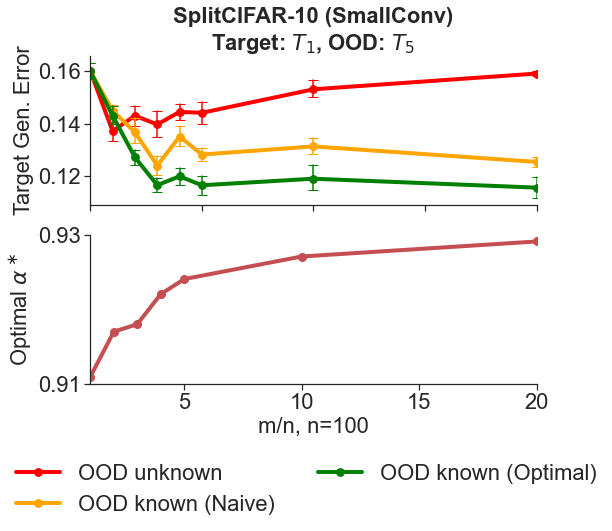

In [37]:
fontsize = 22
labelsize = 22

fig, axes = plt.subplots(2, 1, figsize=(8, 7), facecolor='white')
sns.despine()

ax = axes[0]
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
# file = "/Users/ashwindesilva/research/ood-tl/experiments/results/cifar10_dual_tasks/selected_results/T1_T5/aug_Task_Agnostic/cifar10_smallconv_singlehead_dual_tasks_T1_T5.csv"
file = "results/cifar10_dual_tasks_smallconv/selected_results/T1_T5/aug_Task_Agnostic/cifar10_smallconv_singlehead_dual_tasks_T1_T5.csv"
df = pd.read_csv(file)
df = df.filter(['m', 'r', '5'])
dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')

sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=ax, marker="o", markersize=8, ci=95, lw=4, markeredgecolor=None, palette=("red",), label=r"OOD unknown", legend=False, err_style="bars", err_kws={'solid_capstyle':'projecting', 'capsize':5}) # ($\beta = \frac{n}{n+m}$)

# file = "/Users/ashwindesilva/research/ood-tl/experiments/results/cifar10_dual_tasks/selected_results/T1_T5/aug_Naive_Task_Aware_beta_auto/cifar10_smallconv_singlehead_dual_tasks_T1_T5.csv"
file = "results/cifar10_dual_tasks_smallconv/selected_results/T1_T5/aug_Naive_Task_Aware_beta_auto/cifar10_smallconv_singlehead_dual_tasks_T1_T5.csv"
df = pd.read_csv(file)
df = df.filter(['m', 'r', '5'])
dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')

sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=ax, marker="o", markersize=8,ci=95, lw=4, markeredgecolor=None, palette=("orange",), label=r"OOD known (Naive)", legend=False, err_style="bars", err_kws={'solid_capstyle':'projecting', 'capsize':5}) # ($\beta = \frac{n}{n+m}$)

# file = "/Users/ashwindesilva/research/ood-tl/experiments/results/cifar10_dual_tasks/selected_results/T1_T5/aug_Optimal_Task_Aware_beta_auto/cifar10_smallconv_singlehead_dual_tasks_T1.csv"
file = "results/cifar10_dual_tasks_smallconv/selected_results/T1_T5/aug_Optimal_Task_Aware_beta_auto/cifar10_smallconv_singlehead_dual_tasks_T1.csv"
df = pd.read_csv(file)
alphas = df['5_alpha']
mn = df['m']
df = df.filter(['m', 'r', '5'])
dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')

sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=ax, marker="o", markersize=8, ci=95, lw=4, markeredgecolor=None, palette=("green",), label=r"OOD known (Optimal)", legend=False, err_style="bars", err_kws={'solid_capstyle':'projecting', 'capsize':5}) # ($\beta = \frac{n}{n+m}$)

m_sizes = df['m']

ax.set_ylabel("Target Gen. Error", fontsize=fontsize)
ax.set_title("SplitCIFAR-10 (SmallConv)" + "\n" + "Target: $T_1$, OOD: $T_5$", fontsize=fontsize, fontweight="bold")
ax.set_xlim([min(m_sizes), max(m_sizes)])
ax.set_xlabel(" ")
ax.set_xticklabels(" ")
ax.tick_params(axis='x', labelsize=labelsize)
ax.tick_params(axis='y', labelsize=labelsize)  
ax.xaxis.set_major_locator(MaxNLocator(4))

ax_alpha = axes[1]

mn = np.unique(mn)
alphas = np.unique(alphas)
ax_alpha.plot(mn[1:], alphas[1:], "ro-", markersize=8, lw=4)
ax_alpha.set_ylabel(r"Optimal $\alpha^\ast$", fontsize=fontsize)
ax_alpha.set_xlabel("m/n, n=100", fontsize=fontsize)
ax_alpha.set_xlim([1, 20])
ax_alpha.set_xticks([1, 5, 10, 15, 20])
ax_alpha.set_yticks(ax_alpha.get_ylim())
ax_alpha.tick_params(axis='x', labelsize=labelsize)
ax_alpha.tick_params(axis='y', labelsize=labelsize)
ax_alpha.xaxis.set_major_locator(MaxNLocator(4))
ax_alpha.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.figlegend(handles=ax.get_lines(),
            loc=8,
            ncol=2,
            fontsize=labelsize,
            bbox_to_anchor=(0.5, 0),
            frameon=False)

for ax in axes:
    ax.grid(False)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.3   # the bottom of the subplots of the figure
top = 0.95      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)

plt.show()

In [38]:
fig.savefig("../paper/figs/13-ood-known-aug.pdf", bbox_inches="tight")

### Effect of Beta

(0.996078431372549, 0.8892425990003844, 0.5665974625144176)
(0.7792233756247597, 0.9132333717800846, 0.7518031526336024)


/var/folders/gh/4z024hy17rnf9wmws7wgff6w0000gn/T/ipykernel_75839/2185043239.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(" ")


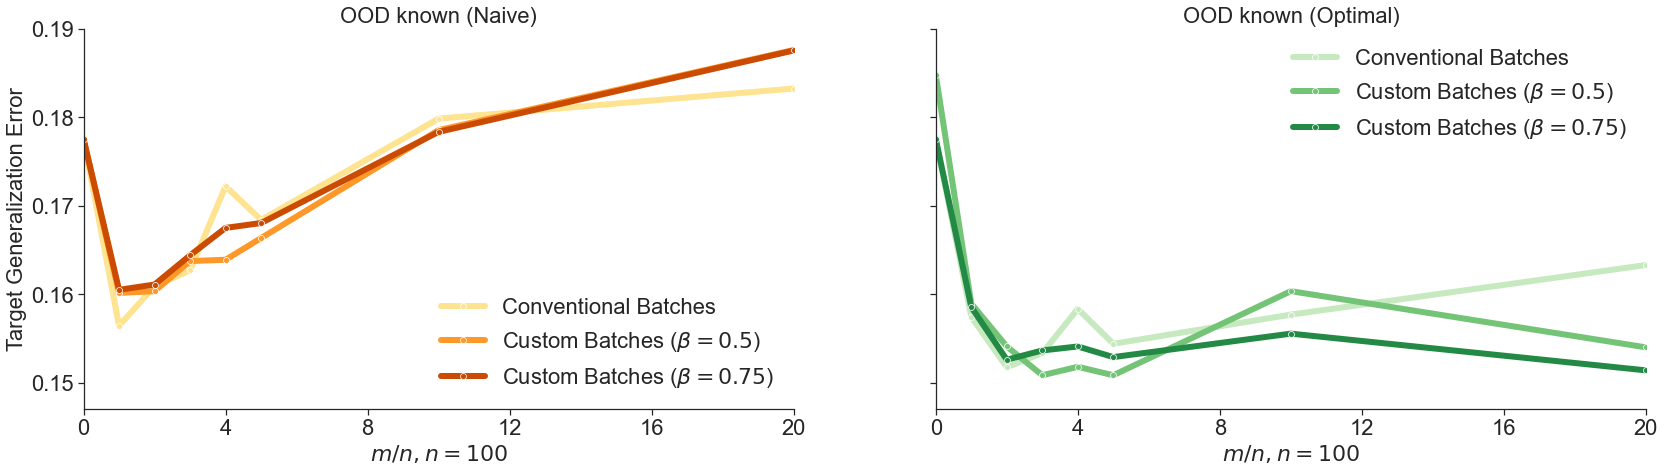

In [40]:
fontsize = 22
labelsize = 22
lw = 6
markersize=4

fig, axes = plt.subplots(1, 2, figsize=(28, 7))
sns.despine()
types = ["Naive_Task_Aware", "Optimal_Task_Aware"]
titles = ["OOD known (Naive)", "OOD known (Optimal)"]
color_idx = np.linspace(0.1, 0.9, 3)

for i, type in enumerate(types):
    if i == 0:
        col = sns.color_palette("YlOrBr", 3)
    if i == 1:
        col = sns.color_palette("Greens", 3)

    print(col[0])
    ax = axes[i]
    file = "/Users/ashwindesilva/research/ood-tl/experiments/results/cifar10_dual_tasks/selected_results/beta_comparison/no_aug_no_beta_{}/cifar10_smallconv_singlehead_dual_tasks_T1_T5.csv".format(type)
    df = pd.read_csv(file)
    df = df.filter(['m', 'r', '5'])
    dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')

    sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=ax, marker="o", ci=None, lw=lw, palette=[col[0],], label="Conventional Batches", legend=False)

    file = "/Users/ashwindesilva/research/ood-tl/experiments/results/cifar10_dual_tasks/selected_results/beta_comparison/no_aug_beta_50_{}/cifar10_smallconv_singlehead_dual_tasks_T1_T5.csv".format(type)
    df = pd.read_csv(file)
    df = df.filter(['m', 'r', '5'])
    dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')

    sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=ax, marker="o", ci=None, lw=lw, palette=[col[1],], label=r"Custom Batches ($\beta = 0.5$)", legend=False)

    file = "/Users/ashwindesilva/research/ood-tl/experiments/results/cifar10_dual_tasks/selected_results/beta_comparison/no_aug_beta_75_{}/cifar10_smallconv_singlehead_dual_tasks_T1_T5.csv".format(type)
    df = pd.read_csv(file)
    df = df.filter(['m', 'r', '5'])
    dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')

    sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=ax, marker="o", ci=None, lw=lw, palette=[col[2],], label=r"Custom Batches ($\beta = 0.75$)", legend=False)

    ax.legend(frameon=False, fontsize=fontsize)
    if i == 0:
        ax.set_ylabel("Target Generalization Error", fontsize=fontsize)
    else:
        ax.set_ylabel(" ")
    ax.set_xlabel(r"$m/n, n=100$", fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=labelsize)
    ax.tick_params(axis='y', labelsize=labelsize)
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_xlim([0, 20])
    ax.set_ylim([0.147, 0.19])
    ax.set_title(titles[i], fontsize=fontsize)
    if i == 1:
        ax.set_yticklabels(" ")

for ax in axes:
    ax.grid(False)
plt.show()


In [41]:
fig.savefig("../paper/figs/14-effect-of-beta.pdf", bbox_inches="tight")

### Effect of target sample size

In [42]:
def get_results(tag):
    api = wandb.Api()
    runs = api.runs("ashwin1996/ood_tl")

    summary_list, config_list, name_list = [], [], []
    m_n = []
    avg_error = []
    std_error = []
    target = []
    ood = []
    gpu = []
    for run in runs: 
        try:
            run_tag = run.config['tag'] 
        except KeyError:
            run_tag = "None"
        if run_tag == tag:
            summary_list.append(run.summary._json_dict)
            config_list.append(
                {k: v for k,v in run.config.items()
                if not k.startswith('_')})
            name_list.append(run.name)
            m_n.append(run.config['task']['m_n'])
            avg_error.append(run.summary['avg_err'])
            std_error.append(run.summary['std_err'])
            target.append(run.config['task']['target'])
            ood.append(run.config['task']['ood'][0])
            gpu.append(run.config['device'])

    runs_df = pd.DataFrame({
        "target": target,
        "ood": ood,
        "m_n": m_n,
        "avg_error": avg_error,
        "std_error": std_error,
        "device": gpu,
        "summary": summary_list,
        "config": config_list,
        "name": name_list
        })

    return runs_df

In [43]:
df_50 = get_results("04_cifar10/wrn-10-2/n50")
df_100 = get_results("04_cifar10/wrn-10-2/n100")
df_200 = get_results("04_cifar10/wrn-10-2/n200")

(0.0, 1000.0)

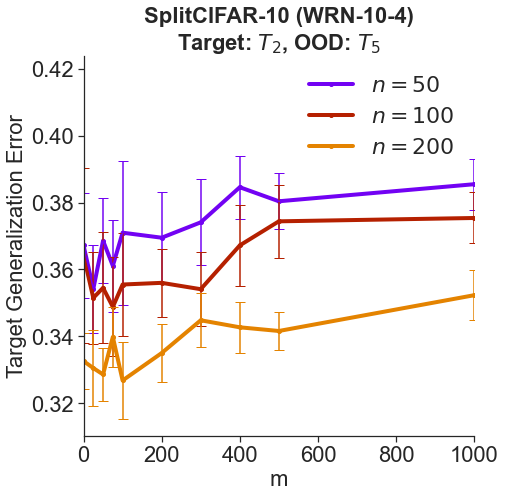

In [44]:
fontsize = 22
labelsize = 22
lw = 4
markersize=4

dfs = [df_50, df_100, df_200]
n_list = [50, 100, 200]
cmap = [plt.cm.gnuplot(i) for i in np.linspace(0.2, 0.8, len(n_list))]

fig, ax = plt.subplots(figsize=(7, 7))
sns.despine()
reps = 10

for i, df in enumerate(dfs):
    df = df.sort_values(by=['m_n']).reset_index(drop=True)
    m = df['m_n'].to_numpy() * n_list[i]
    avg_error = df['avg_error'].to_numpy()
    std_error = df['std_error'].to_numpy()

    ci = 1.96 * std_error / np.sqrt(reps)
    ax.plot(m, avg_error , color=cmap[i], lw=lw, marker='o', markersize=markersize, label=r"$n = {}$".format(n_list[i]))
    ax.errorbar(m, avg_error, yerr=ci, color=cmap[i], solid_capstyle='projecting', capsize=5)
    ax.set_ylabel("Target Generalization Error", fontsize=fontsize)
    ax.set_xlabel("m", fontsize=fontsize)
    ax.set_title("SplitCIFAR-10 (WRN-10-4)" + "\n" + r"Target: $T_2$, OOD: $T_5$", fontsize=fontsize, fontweight='bold')
    ax.tick_params(axis='x', labelsize=labelsize)
    ax.tick_params(axis='y', labelsize=labelsize)
ax.legend(fontsize=labelsize, frameon=False)
ax.grid(False)
ax.set_xlim([0, 1000])
# legend = ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", fontsize=labelsize, frameon=False, title="Blur Level\n     ($\sigma$)")
# legend.get_title().set_fontsize(fontsize)

In [45]:
fig.savefig("../paper/figs/15-effect-of-target-samples-cifar10.pdf", bbox_inches="tight")

### Task Matrix

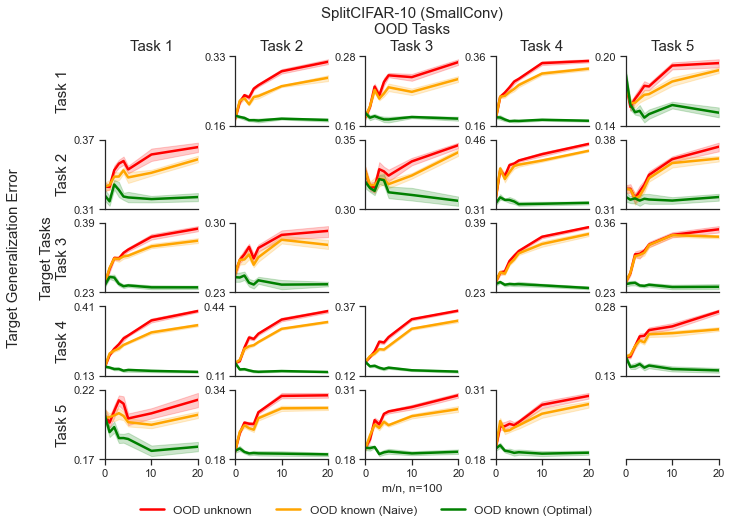

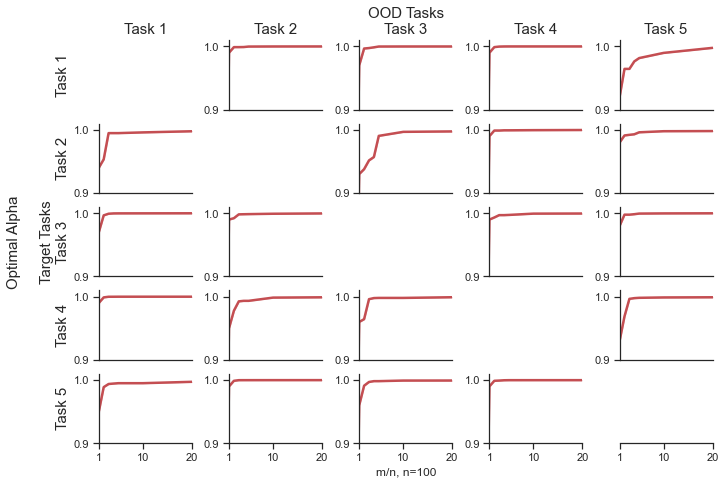

In [47]:
fig1, axs = plt.subplots(5, 5, figsize=(11, 7), facecolor='white')
sns.despine()
for i in range(5):
    for j in range(5):
        axs[i][j].set_ylabel(" ")
        axs[i][j].grid(False)
        axs[i][j].xaxis.set_visible(False)
        axs[i][j].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        if i == 0:
            axs[i][j].set_title("Task {}".format(j+1), fontsize=15)
        if i == 4:
            axs[i][j].xaxis.set_visible(True)
        if j == 0:
            axs[i][j].yaxis.set_visible(True)
            axs[i][j].set_ylabel("Task {}".format(i+1), fontsize=15)
        if j == i:
            axs[i][j].axis('off')
            if i == 0: 
                axs[i][j].axis('on')
                axs[i][j].set_yticks([0.10, 0.30, 0.50])
                axs[i][j].tick_params(axis='y', colors='white')
                axs[i][j].set_ylabel("Task 1",fontsize=15)
                axs[i][j].spines['top'].set_visible(False)
                axs[i][j].spines['bottom'].set_visible(False)
                axs[i][j].spines['right'].set_visible(False)
                axs[i][j].spines['left'].set_visible(False)
            if j == 4:
                axs[i][j].axis('on')
                axs[i][j].yaxis.set_visible(False)
                axs[i][j].set_xlim([0, 20])
                axs[i][j].set_xticks([0, 10, 20])
                axs[i][j].spines['top'].set_visible(False)
                axs[i][j].spines['right'].set_visible(False)
                axs[i][j].spines['left'].set_visible(False)
            continue
        file = "results/task_matrix_cifar10_wrn/T{}_T{}_Task_Agnostic/cifar10_smallconv_singlehead_dual_tasks_T{}_T{}.csv".format(i+1, j+1, i+1, j+1)
        df = pd.read_csv(file)
        df = df.filter(["m", "r", str(j+1)])
        ax = sns.lineplot(data=df, x="m", y=str(j+1), ax=axs[i][j], markers=True, color='red', lw=2.5, label="OOD unknown", legend=False)

        file = "results/task_matrix_cifar10_wrn/T{}_T{}_Naive_Task_Aware/cifar10_smallconv_singlehead_dual_tasks_T{}_T{}.csv".format(i+1, j+1, i+1, j+1)
        df = pd.read_csv(file)
        df = df.filter(["m", "r", str(j+1)])
        ax = sns.lineplot(data=df, x="m", y=str(j+1), ax=axs[i][j], markers=True, color='orange', lw=2.5, label="OOD known (Naive)", legend=False)

        file = "results/task_matrix_cifar10_wrn/T{}_T{}_Optimal_Task_Aware/cifar10_smallconv_singlehead_dual_tasks_T{}_T{}.csv".format(i+1, j+1, i+1, j+1)
        df = pd.read_csv(file)
        df = df.filter(["m", "r", str(j+1)])
        ax = sns.lineplot(data=df, x="m", y=str(j+1), ax=axs[i][j], markers=True, color='green', lw=2.5, label="OOD known (Optimal)", legend=False)
        
        # ax.set_ylim([0.10, 0.50])
        ax.set_yticks(ax.get_ylim())
        ax.set_xlim([0, 20])
        # ax.set_xscale("symlog", linthresh=10)
        ax.set_xlim(ax.get_xlim())
        # ax.set_ylim([0.10, 0.50])
        # axs[i][j].set_yticks([0.10, 0.30, 0.50])
        if i == 4 and j == 2:
            ax.set_xlabel("m/n, n=100")
        else:
            ax.set_xlabel("")
        if i == 2 and j == 0:
            ax.set_ylabel('Target Generalization Error\n\nTarget Tasks\nTask 3', multialignment='center')
        if i == 0 and j == 2:
            ax.set_title("SplitCIFAR-10 (SmallConv)" + "\n" + 'OOD Tasks\nTask 3', multialignment='center', fontsize=15)
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.13   # the bottom of the subplots of the figure
top = 0.93      # the top of the subplots of the figure
wspace = 0.4   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.figlegend(handles=ax.get_lines(),
            frameon=False,
            loc=8,
            ncol=3,
            fontsize=12)
plt.show()

# if save_fig:
#     filename = "splitcifar_task_matrix_errors"
#     fig.savefig("./figures/{}.pdf".format(filename), bbox_inches="tight")

fig2, axs = plt.subplots(5, 5, figsize=(11, 7), facecolor='white')
sns.despine()
for i in range(5):
    for j in range(5):
        axs[i][j].set_ylabel(" ")
        axs[i][j].grid(False)
        # axs[i][j].yaxis.set_visible(False)
        axs[i][j].xaxis.set_visible(False)
        axs[i][j].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        if i == 0:
            axs[i][j].set_title("Task {}".format(j+1), fontsize=15)
        if i == 4:
            axs[i][j].xaxis.set_visible(True)
        if j == 0:
            axs[i][j].yaxis.set_visible(True)
            axs[i][j].set_ylabel("Task {}".format(i+1), fontsize=15)
        if j == i:
            axs[i][j].axis('off')
            if i == 0: 
                axs[i][j].axis('on')
                axs[i][j].set_yticks([0.10, 0.30, 0.50])
                axs[i][j].tick_params(axis='y', colors='white')
                axs[i][j].set_ylabel("Task 1",fontsize=15)
                axs[i][j].spines['top'].set_visible(False)
                axs[i][j].spines['bottom'].set_visible(False)
                axs[i][j].spines['right'].set_visible(False)
                axs[i][j].spines['left'].set_visible(False)
            if j == 4:
                axs[i][j].axis('on')
                axs[i][j].yaxis.set_visible(False)
                axs[i][j].set_xlim([1, 20])
                axs[i][j].set_xticks([1, 10, 20])
                axs[i][j].spines['top'].set_visible(False)
                axs[i][j].spines['right'].set_visible(False)
                axs[i][j].spines['left'].set_visible(False)
            continue
        file = "results/task_matrix_cifar10_wrn/T{}_T{}_Optimal_Task_Aware/cifar10_smallconv_singlehead_dual_tasks_T{}.csv".format(i+1, j+1, i+1)
        df = pd.read_csv(file)
        df = df.filter(["m", "r", "{}_alpha".format(j+1)])
        ax = sns.lineplot(data=df, x="m", y="{}_alpha".format(j+1), ax=axs[i][j], markers=True, color='r', lw=2.5)
        
        ax.set_ylim([0.90, 1.01])
        ax.set_yticks([0.9, 1.0])
        ax.set_xlim([1, 20])
        ax.set_xticks([1, 10, 20])
        # ax.set_xlim(ax.get_xlim())
        # ax.set_ylim([0.10, 0.50])
        # axs[i][j].set_yticks([0.10, 0.30, 0.50])
        if i == 4 and j == 2:
            ax.set_xlabel("m/n, n=100")
        else:
            ax.set_xlabel("")
        if i == 2 and j == 0:
            ax.set_ylabel('Optimal Alpha\n\nTarget Tasks\nTask 3', multialignment='center')
        if i == 0 and j == 2:
            ax.set_title('OOD Tasks\nTask 3', multialignment='center', fontsize=15)
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.4   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.show()


In [48]:
fig1.savefig("../paper/figs/16-cifar10-smallconv-risk-matrix.pdf", bbox_inches="tight")
fig2.savefig("../paper/figs/16-cifar10-smallconv-alpha-matrix.pdf", bbox_inches="tight")

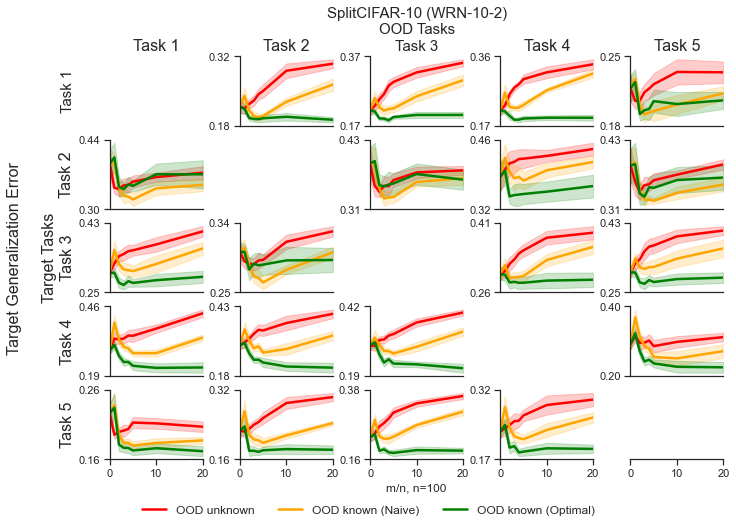

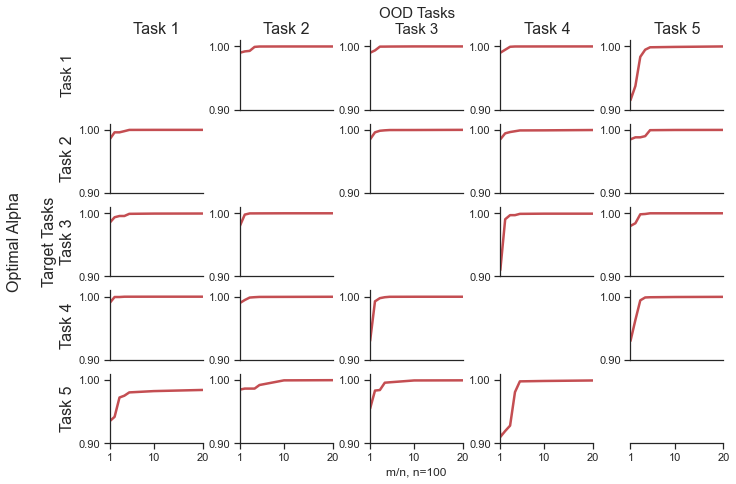

In [49]:
import ast

df_agnostic = pd.read_csv("results/09_wrn_cifar_agnostic.csv")
df_naive = pd.read_csv("results/09_wrn_cifar_naive.csv")
df_opt = pd.read_csv("results/09_wrn_cifar_opt.csv")

dfs = [df_agnostic, df_naive, df_opt]
colors = ["red", "orange", "green"]
labels = ["OOD unknown", "OOD known (Naive)", "OOD known (Optimal)"]

fontsize = 16

fig1, axes = plt.subplots(5, 5, figsize=(11, 7), facecolor='white')
sns.despine()
df_agnostic = df_agnostic.sort_values(by=['target', 'ood', 'm_n']).reset_index(drop=True)

for k, df in enumerate(dfs):
    df = df.sort_values(by=['target', 'ood', 'm_n']).reset_index(drop=True)

    for i in range(5):
        for j in range(5):
            ax = axes[i][j]
            ax.set_ylabel(" ")
            ax.grid(False)
            # ax.yaxis.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            if j == 0:
                ax.yaxis.set_visible(True)
                ax.set_ylabel("Task {}".format(i+1), fontsize=fontsize)
            if i == 4:
                ax.xaxis.set_visible(True)
            if i == 0:
                ax.set_title("Task {}".format(j+1), fontsize=fontsize)
            if i == j: 
                ax.axis('off')
                if i == 0:
                    ax.axis('on')
                    ax.set_yticks([0.10, 0.30, 0.50])
                    ax.tick_params(axis='y', colors='white')
                    ax.set_ylabel("Task 1",fontsize=15)
                    ax.spines['top'].set_visible(False)
                    ax.spines['bottom'].set_visible(False)
                    ax.spines['right'].set_visible(False)
                    ax.spines['left'].set_visible(False)
                if j == 4:
                    ax.axis('on')
                    ax.yaxis.set_visible(False)
                    ax.set_xlim([0, 20])
                    ax.set_xticks([0, 10, 20])
                    ax.spines['top'].set_visible(False)
                    ax.spines['right'].set_visible(False)
                    ax.spines['left'].set_visible(False)
                continue

            dft = df[(df["target"]==i) & (df["ood"]==j)]
            if k==2 and len(np.unique(dft['device']))==2:
                avg_err = np.array(dft[(dft["target"]==i) & (dft["ood"]==j) & (dft["device"]=='cuda:3')]["avg_error"])
                std_err = np.array(dft[(dft["target"]==i) & (dft["ood"]==j) & (dft["device"]=='cuda:3')]["std_error"])
                m_n = np.array(dft[(dft["target"]==i) & (dft["ood"]==j) & (dft["device"]=='cuda:3')]["m_n"])
            else:
                avg_err = np.array(dft[(dft["target"]==i) & (dft["ood"]==j)]["avg_error"])
                std_err = np.array(dft[(dft["target"]==i) & (dft["ood"]==j)]["std_error"])
                m_n = np.array(dft[(dft["target"]==i) & (dft["ood"]==j)]["m_n"])

            if len(avg_err)==0:
                continue

            avg_err_ag = np.array(df_agnostic[(df_agnostic["target"]==i) & (df_agnostic["ood"]==j)]["avg_error"])
            std_err_ag = np.array(df_agnostic[(df_agnostic["target"]==i) & (df_agnostic["ood"]==j)]["std_error"])
            
            avg_err[0] = avg_err_ag[0]
            std_err[0] = std_err_ag[0]

            ci = 1.96 * std_err.astype('float')/np.sqrt(10)
            ax.plot(m_n, avg_err, c=colors[k], label=labels[k], lw=2.5)
            ax.fill_between(m_n, avg_err-ci, avg_err+ci, color=colors[k], alpha=0.2)
            # ax.set_ylim([0.10, 0.5])

            # ax.set_ylim([0.10, 0.50])
            ax.set_yticks(ax.get_ylim())
            ax.set_xlim([0, 20])
            # ax.set_xscale("symlog", linthresh=10)
            ax.set_xlim(ax.get_xlim())
            # ax.set_ylim([0.10, 0.50])
            # axs[i][j].set_yticks([0.10, 0.30, 0.50])

            if i == 4 and j == 2:
                ax.set_xlabel("m/n, n=100")
            else:
                ax.set_xlabel("")
            if i == 2 and j == 0:
                ax.set_ylabel('Target Generalization Error\n\nTarget Tasks\nTask 3', multialignment='center')
            if i == 0 and j == 2:
                ax.set_title("SplitCIFAR-10 (WRN-10-2)" + "\n" + 'OOD Tasks\nTask 3', multialignment='center', fontsize=15)
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.13   # the bottom of the subplots of the figure
top = 0.93      # the top of the subplots of the figure
wspace = 0.4   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)

legend_elements = [
    Line2D([0], [0], color='red', lw=2.5, label=labels[0]),
    Line2D([0], [0], color='orange', lw=2.5, label=labels[1]),
    Line2D([0], [0], color='green', lw=2.5, label=labels[2])
]

plt.figlegend(handles=legend_elements,
            frameon=False,
            loc=8,
            ncol=3,
            fontsize=12)
plt.show()

fig2, axes = plt.subplots(5, 5, figsize=(11, 7), facecolor='white')
sns.despine()

df = dfs[2].sort_values(by=['target', 'ood', 'm_n']).reset_index(drop=True)

for i in range(5):
    for j in range(5):
        ax = axes[i][j]
        ax.set_ylabel(" ")
        ax.grid(False)
        # ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        if j == 0:
            ax.yaxis.set_visible(True)
            ax.set_ylabel("Task {}".format(i+1), fontsize=fontsize)
        if i == 4:
            ax.xaxis.set_visible(True)
        if i == 0:
            ax.set_title("Task {}".format(j+1), fontsize=fontsize)
        if i == j: 
            ax.axis('off')
            if i == 0:
                ax.axis('on')
                ax.set_yticks([0.10, 0.30, 0.50])
                ax.tick_params(axis='y', colors='white')
                ax.set_ylabel("Task 1",fontsize=15)
                ax.spines['top'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['right'].set_visible(False)
                ax.spines['left'].set_visible(False)
            if j == 4:
                ax.axis('on')
                ax.yaxis.set_visible(False)
                ax.set_xlim([1, 20])
                ax.set_xticks([1, 10, 20])
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                ax.spines['left'].set_visible(False)
            continue

        dft = df[(df["target"]==i) & (df["ood"]==j)]
        if len(np.unique(dft['device']))==2:
            dfa = dft[(dft["target"]==i) & (dft["ood"]==j) & (dft["device"]=='cuda:3')].reset_index(drop=True)
        else:
            dfa = dft[(dft["target"]==i) & (dft["ood"]==j)].reset_index(drop=True)

        m_n = np.array(dfa[(dfa["target"]==i) & (dfa["ood"]==j)]["m_n"])

        opt_alpha = []
        for k in range(len(dfa)):
            dicta = ast.literal_eval(dfa['summary'][k])
            opt_alpha.append(dicta['alpha'])

        if len(opt_alpha)==0:
            continue

        ax.plot(m_n, opt_alpha, c='r', lw=2.5)
        # ax.set_ylim([0.10, 0.5])

        ax.set_ylim([0.90, 1.01])
        ax.set_yticks([0.9, 1.0])
        ax.set_xlim([1, 20])
        ax.set_xticks([1, 10, 20])

        if i == 4 and j == 2:
            ax.set_xlabel("m/n, n=100")
        else:
            ax.set_xlabel("")
        if i == 2 and j == 0:
            ax.set_ylabel('Optimal Alpha\n\nTarget Tasks\nTask 3', multialignment='center')
        if i == 0 and j == 2:
            ax.set_title('OOD Tasks\nTask 3', multialignment='center', fontsize=15)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.13   # the bottom of the subplots of the figure
top = 0.93      # the top of the subplots of the figure
wspace = 0.4   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)

plt.show()


In [50]:
fig1.savefig("../paper/figs/17-cifar10-wrn102-risk-matrix.pdf", bbox_inches="tight")
fig2.savefig("../paper/figs/17-cifar10-wrn102-alpha-matrix.pdf", bbox_inches="tight")

/var/folders/gh/4z024hy17rnf9wmws7wgff6w0000gn/T/ipykernel_75839/1294158080.py:122: UserWarning: The handle <matplotlib.lines.Line2D object at 0x29305f400> has a label of '_child0' which cannot be automatically added to the legend.
  plt.figlegend(handles=ax.get_lines(),


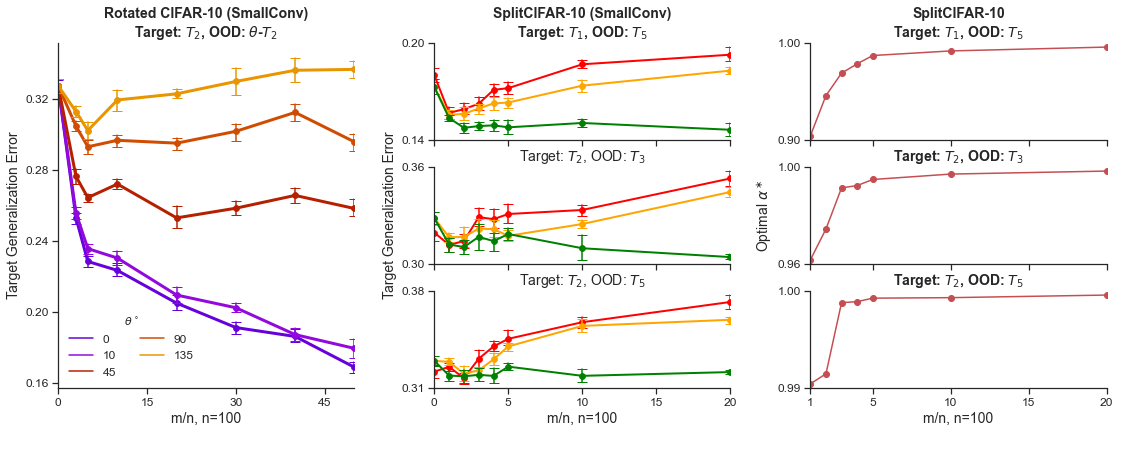

In [51]:
fontsize = 14
labelsize = 12

tasks=[[1, 5], [2, 3], [2, 5]]
beta=0.75

outer = [['left', 'upper middle', 'upper right'],
            ['left', 'middle middle', 'middle right'],
            ['left', 'lower middle', 'lower right']]

fig, axes = plt.subplot_mosaic(outer, figsize=(16, 6))
sns.despine()

# file = "/Users/ashwindesilva/research/ood-tl/experiments/results/cifar10_rotated_tasks/selected_results/naive_task_aware/no_aug_cifar10_smallconv_singlehead_rotated_tasks_long_range.csv"
file = "results/cifar10_rotated_tasks_smallconv/selected_results/naive_task_aware/no_aug_cifar10_smallconv_singlehead_rotated_tasks_long_range.csv"

df = pd.read_csv(file)
df = df.filter(['m', 'r', '0', '10', '45', '90', '135'])
m_sizes = df['m']

ax = axes['left']
dfm = df.melt(['m', 'r'], var_name='angle', value_name='Risk')
# fig, ax = plt.subplots(figsize=(7, 8), facecolor='white')
ax = sns.lineplot(data=dfm, x="m", y="Risk", hue="angle", marker="o", markeredgecolor=None, ax=ax, ci=95, lw=3, palette='gnuplot', legend=True, err_style="bars", err_kws={'solid_capstyle':'projecting', 'capsize':5})
ax.set_ylabel("Target Generalization Error", fontsize=fontsize)
ax.set_xlabel(r"m/n, n=100", fontsize=fontsize)
ax.tick_params(axis='x', labelsize=labelsize)
ax.tick_params(axis='y', labelsize=labelsize)
ax.xaxis.set_major_locator(MaxNLocator(4)) 
ax.yaxis.set_major_locator(MaxNLocator(5)) 
ax.set_xlim([min(m_sizes), max(m_sizes)])
ax.set_title(r"Rotated CIFAR-10 (SmallConv)" + "\n" + r"Target: $T_2$, OOD: $\theta$-$T_2$", fontsize=fontsize, fontweight='bold')
ax.legend(title=r"$\theta^\circ$", title_fontsize=fontsize-3, frameon=False, fontsize=fontsize-2, ncol=2, loc=3)

path = "/Users/ashwindesilva/research/ood-tl/experiments/results/cifar10_dual_tasks/selected_results"
folders = ["T1_T5", "T2_T3", "T2_T5"]
for i in range(3):
    ax = axes[outer[i][1]]
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    file = "{}/{}/Task_Agnostic/cifar10_smallconv_singlehead_dual_tasks_T{}.csv".format(path, folders[i], tasks[i][0])
    df = pd.read_csv(file)
    df = df.filter(['m', 'r', str(tasks[i][1])])
    dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')

    sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=ax, marker="o", markeredgecolor=None, ci=95, lw=2, palette=("red",), label="OOD unknown", legend=False, err_style="bars", err_kws={'solid_capstyle':'projecting', 'capsize':5})

    file = "{}/{}/Naive_Task_Aware_beta_{}/cifar10_smallconv_singlehead_dual_tasks_T{}.csv".format(path, folders[i], beta, tasks[i][0])
    df = pd.read_csv(file)
    df = df.filter(['m', 'r', str(tasks[i][1])])
    dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')

    sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=ax, marker="o", markeredgecolor=None, ci=95, lw=2, palette=("orange",), label=r"OOD known (Naive)", legend=False, err_style="bars", err_kws={'solid_capstyle':'projecting', 'capsize':5}) # ($\beta = \frac{n}{n+m}$)

    file = "{}/{}/Optimal_Task_Aware_beta_{}/cifar10_smallconv_singlehead_dual_tasks_T{}.csv".format(path, folders[i], beta, tasks[i][0])
    df = pd.read_csv(file)
    alphas = df['{}_alpha'.format(tasks[i][1])]
    mn = df['m']
    df = df.filter(['m', 'r', str(tasks[i][1])])
    dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')

    sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=ax, marker="o", markeredgecolor=None, ci=95, lw=2, palette=("green",), label=r"OOD known (Optimal)", legend=False, err_style="bars", err_kws={'solid_capstyle':'projecting', 'capsize':5}) # ($\beta = \frac{n}{n+m}$)

    m_sizes = df['m']
    ax.set_xlim([min(m_sizes), max(m_sizes)])
    ax.set_yticks(ax.get_ylim())
    if i == 0:
        ax.set_title(r"SplitCIFAR-10 (SmallConv)" + "\n" + r"Target: $T_{}$, OOD: $T_{}$".format(tasks[i][0], tasks[i][1]), fontsize=fontsize, fontweight='bold')
    else:
        ax.set_title(r"Target: $T_{}$, OOD: $T_{}$".format(tasks[i][0], tasks[i][1]), fontsize=fontsize)
    ax.tick_params(axis='y', labelsize=labelsize)
    ax.xaxis.set_major_locator(MaxNLocator(4)) 

    ax_alpha = axes[outer[i][2]]

    mn = np.unique(mn)
    alphas = np.unique(alphas)
    ax_alpha.plot(mn[1:], alphas[1:], "ro-")
    ax_alpha.set_xlabel(r"m/n, n=100")
    ax_alpha.set_xlim([1, 20])
    ax_alpha.set_xticks([1, 5, 10, 15, 20])
    ax_alpha.set_yticks(ax_alpha.get_ylim())
    ax_alpha.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    if i == 0:
        ax_alpha.set_title(r"SplitCIFAR-10" + "\n" + r"Target: $T_{}$, OOD: $T_{}$".format(tasks[i][0], tasks[i][1]), fontsize=fontsize, fontweight='bold')
    else:
        ax_alpha.set_title(r"Target: $T_{}$, OOD: $T_{}$".format(tasks[i][0], tasks[i][1]), fontsize=fontsize, fontweight='bold')
    ax_alpha.tick_params(axis='y', labelsize=labelsize)

    if i==1:
        ax.set_ylabel("Target Generalization Error", fontsize=fontsize)
        ax_alpha.set_ylabel(r"Optimal $\alpha^\ast$", fontsize=fontsize)
    else:
        ax.set_ylabel("")
        ax_alpha.set_ylabel("")

    if i==2:    
        ax.set_xlabel(r"m/n, n=100", fontsize=fontsize)
        ax.tick_params(axis='x', labelsize=labelsize)
        ax.tick_params(axis='y', labelsize=labelsize)  
        ax_alpha.set_xlabel(r"m/n, n=100", fontsize=fontsize)
        ax_alpha.tick_params(axis='x', labelsize=labelsize)
        ax_alpha.tick_params(axis='y', labelsize=labelsize)
    else:
        ax.set_xlabel("")
        ax.set_xticklabels("")
        ax_alpha.set_xlabel("")
        ax_alpha.set_xticklabels("")

for ax in list(axes.values()):
    ax.tick_params(labelsize=labelsize)
    ax.grid(False)

left  = 0.07  # the left side of the subplots of the figure
right = 0.98    # the right side of the subplots of the figure
bottom = 0.15   # the bottom of the subplots of the figure
top = 0.95      # the top of the subplots of the figure
wspace = 0.27   # the amount of width reserved for blank space between subplots
hspace = 0.27   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)

plt.figlegend(handles=ax.get_lines(),
            loc=4,
            ncol=3,
            fontsize=labelsize+0.5,
            frameon=False)

plt.show()


In [52]:
fig.savefig("../paper/figs/18-simdata-extra.pdf", bbox_inches="tight")

### DomainNet 40-class

In [53]:
import os
os.environ['WANDB_DIR'] = '/Users/ashwindesilva/wandb'
os.environ['WANDB_CACHE_DIR'] = '/Users/ashwindesilva/wandb'
os.environ['WANDB_CONFIG_DIR'] = '/Users/ashwindesilva/wandb'

In [54]:
api = wandb.Api()
runs = api.runs("ashwin1996/ood-tl-extra")
tag = ['final-DN-RvQ-fine-grained-5', 'final-DN-RvP-fine-grained-5', 'final-DN-RvS-fine-grained-5'] 
# tag = ['final-DN-RvQ-coarse-grained-5', 'final-DN-RvP-coarse-grained-5', 'final-DN-RvS-coarse-grained-5'] 
# tag = ['final-DN-RvQ-coarse-grained-6', 'final-DN-RvP-coarse-grained-6', 'final-DN-RvS-coarse-grained-6'] 

# summary_list, config_list, name_list = [], [], []
m_n = []
avg_error = []
std_error = []
target = []
ood = []
# gpu = []
for run in runs: 
    run_tag = run.config['tag'] 
    if run_tag in tag:
        # summary_list.append(run.summary._json_dict)
        # config_list.append(
        #     {k: v for k,v in run.config.items()
        #     if not k.startswith('_')})
        # name_list.append(run.name)
        m_n.append(run.config['task']['m_n'])
        avg_error.append(run.summary['avg_err'])
        std_error.append(run.summary['std_err'])
        target.append(run.config['task']['target_env'])
        ood.append(run.config['task']['ood_env'])

runs_df = pd.DataFrame({
    "target": target,
    "ood": ood,
    "m_n": m_n,
    "avg_error": avg_error,
    "std_error": std_error
    })

runs_df = runs_df.sort_values(by=['target', 'ood', 'm_n']).reset_index(drop=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


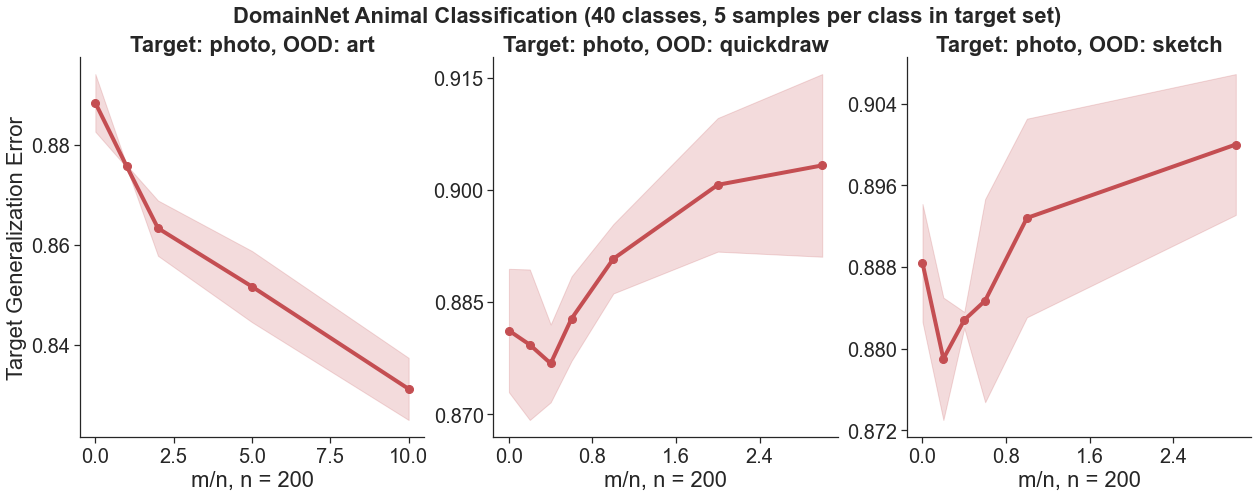

In [55]:
fontsize = 22
labelsize = 20
lw = 4
markersize = 8

target = "real"
ood_list = ["paint", "quick", "sketch"]
names = ["photo", "art", "quickdraw", "sketch"]
select = [[0, 1, 2, 5, 7], [0, 1, 2, 3, 5, 6, 7], [0, 1, 2, 3, 5, 7]] # fine-grained
# select = [[0, 1, 2, 5, 7], [0, 1, 2, 3, 5, 6, 7], [0, 1, 2, 3, 5, 7]] # course-grained

fig, axes = plt.subplots(1, 3, figsize=(21, 7))
sns.despine()
reps = 3
n = 200

for i, ood in enumerate(ood_list):
    df = runs_df[runs_df['ood']==ood].reset_index()
    m_n = df['m_n'].to_numpy()[select[i]]
    avg_error = df['avg_error'].to_numpy()[select[i]]
    std_error = df['std_error'].to_numpy()[select[i]]

    ax = axes[i]
    ci = 1.96 * std_error / np.sqrt(reps)
    ax.plot(m_n, avg_error , color='r', lw=lw, marker='o', markersize=markersize)
    ax.fill_between(m_n, avg_error  - ci, avg_error + ci, color='r', alpha=0.2)
    ax.set_xlabel("m/n, n = {}".format(n), fontsize=fontsize)
    ax.set_title("Target: {}, OOD: {}".format(names[0], names[i+1]), fontsize=fontsize, fontweight='bold')
    ax.tick_params(axis='x', labelsize=labelsize)
    ax.tick_params(axis='y', labelsize=labelsize)
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.legend(fontsize=fontsize, frameon=False)
    ax.grid(False)

    if i == 0:
        ax.set_ylabel("Target Generalization Error", fontsize=fontsize)

    fig.suptitle("DomainNet Animal Classification (40 classes, 5 samples per class in target set)", fontsize=fontsize, fontweight='bold')
                 
plt.show()

In [56]:
fig.savefig("../paper/figs/19-domainnet-40-class.pdf", bbox_inches="tight")